In [1]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("prasoonkottarathil/btcinusd")

# Display the path to the downloaded files
print("Path to dataset files:", path)


100%|██████████| 80.2M/80.2M [00:02<00:00, 41.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prasoonkottarathil/btcinusd/versions/4


In [4]:
import os

# List the files in the path
path = '/root/.cache/kagglehub/datasets/prasoonkottarathil/btcinusd/versions/4'
files = os.listdir(path)

# Display the files
print(files)

['BTC-2019min.csv', 'BTC-2018min.csv', 'BTC-Daily.csv', 'BTC-2021min.csv', 'BTC-2020min.csv', 'BTC-2017min.csv', 'BTC-Hourly.csv']


In [5]:
import pandas as pd

# Define the path to the daily data file
file_path = '/root/.cache/kagglehub/datasets/prasoonkottarathil/btcinusd/versions/4/BTC-Daily.csv'

# Load the data
data = pd.read_csv(file_path)

# Preview the first few rows of the data
print(data.head())

         unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2  1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3  1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4  1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   

      close   Volume BTC    Volume USD  
0  43185.48    49.006289  2.116360e+06  
1  43178.98  3160.618070  1.364723e+08  
2  37712.68  1701.817043  6.418008e+07  
3  39146.66   912.724087  3.573010e+07  
4  39231.64  2202.851827  8.642149e+07  


In [6]:
# Check for missing values in the dataset
data.info()

# You can also display the first few rows to get a sense of the data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [8]:
# Print the column names to inspect the dataset
print(data.columns)

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Scale the 'close' prices to a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['close']])

# Preview the scaled data
print(scaled_data[:5])

[[0.63835898]
 [0.63826253]
 [0.55715655]
 [0.57843316]
 [0.57969405]]


In [10]:
import numpy as np

# Function to prepare the data for time series prediction
def prepare_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Prepare sequences of 50 days
seq_length = 50
X, y = prepare_sequences(scaled_data, seq_length)

# Reshape X for Bi-LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Preview the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2601, 50, 1)
Shape of y: (2601, 1)


In [29]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# Define the Bi-LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=100, return_sequences=False), input_shape=(X_bilstm.shape[1], X_bilstm.shape[2])))
model_bilstm.add(Dense(1))

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the Bi-LSTM model
history_bilstm = model_bilstm.fit(X_bilstm, y, epochs=20, batch_size=32, validation_split=0.2)

# Capture the loss values for plotting
bilstm_train_loss = history_bilstm.history['loss']
bilstm_val_loss = history_bilstm.history['val_loss']


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 0.0200 - val_loss: 5.0571e-05
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0013 - val_loss: 1.3644e-04
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 8.8547e-04 - val_loss: 4.9993e-05
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 9.8669e-04 - val_loss: 1.4997e-04
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 7.0460e-04 - val_loss: 3.8193e-05
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 5.1458e-04 - val_loss: 1.3156e-05
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 5.6206e-04 - val_loss: 2.6688e-05
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 6.0882e-04 - val_loss: 9.1015e-08
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 4.6109e-04 - val_loss: 3.0713e-05
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.0542e-04 - val_loss: 9.9875e-06
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.5815e-04 - val_

In [42]:
import torch
import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define the HGNN model (simplified graph for a single node)
class HGNN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(HGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)  # Apply graph convolution
        x = x.view(-1, 1)  # Ensure the output is reshaped to match the target size
        return x

# Instantiate the HGNN model
model_hgnn = HGNN(in_channels=1, out_channels=64)

# Check model structure
print(model_hgnn)


HGNN(
  (conv1): GCNConv(1, 64)
)


In [44]:
import torch
from torch.utils.data import DataLoader, TensorDataset  # Correct import for TensorDataset
import torch_geometric
from torch_geometric.data import Data
import torch.optim as optim


# Prepare data for HGNN
# Convert data to PyTorch tensors
hgnn_input = torch.tensor(scaled_data[:len(X)], dtype=torch.float32)  # Same data used for Bi-LSTM
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Target for HGNN (same as Bi-LSTM)

# Create a DataLoader to load data in batches
train_data = TensorDataset(hgnn_input, y_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Check data loader batch shape
for X_batch, y_batch in train_loader:
    print(X_batch.shape, y_batch.shape)
    break


torch.Size([32, 1]) torch.Size([32, 1])


In [50]:
import torch
from torch_geometric.data import Data
import torch.optim as optim

class HGNN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(HGNN, self).__init__()
        self.conv1 = torch_geometric.nn.GCNConv(in_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)  # Apply graph convolution
        return x  # Remove the view operation here

# Instantiate the HGNN model
model_hgnn = HGNN(in_channels=1, out_channels=1)  # Changed out_channels to 1

# Create optimizer and loss function
optimizer = optim.Adam(model_hgnn.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

# Training loop for HGNN
num_epochs = 20
train_loss_history = []

for epoch in range(num_epochs):
    model_hgnn.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        # Create edge_index for the batch
        batch_size = X_batch.shape[0]
        edge_index = torch.tensor([[i, i] for i in range(batch_size)], dtype=torch.long).t().contiguous()

        # Reshape input if necessary
        if len(X_batch.shape) > 2:
            X_batch = X_batch.reshape(batch_size, -1)

        # Ensure input has correct number of features
        if X_batch.shape[1] != 1:
            X_batch = X_batch[:, :1]

        # Forward pass
        data = Data(x=X_batch, edge_index=edge_index)
        outputs = model_hgnn(data)

        # Ensure shapes match
        outputs = outputs.reshape(-1, 1)
        y_batch = y_batch.reshape(-1, 1)

        # Compute the loss
        loss = criterion(outputs, y_batch)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Capture the final loss for plotting
hgnn_train_loss = train_loss_history

Epoch [1/20], Loss: 0.0172
Epoch [2/20], Loss: 0.0137
Epoch [3/20], Loss: 0.0121
Epoch [4/20], Loss: 0.0107
Epoch [5/20], Loss: 0.0097
Epoch [6/20], Loss: 0.0092
Epoch [7/20], Loss: 0.0086
Epoch [8/20], Loss: 0.0083
Epoch [9/20], Loss: 0.0081
Epoch [10/20], Loss: 0.0081
Epoch [11/20], Loss: 0.0079
Epoch [12/20], Loss: 0.0079
Epoch [13/20], Loss: 0.0079
Epoch [14/20], Loss: 0.0079
Epoch [15/20], Loss: 0.0079
Epoch [16/20], Loss: 0.0079
Epoch [17/20], Loss: 0.0078
Epoch [18/20], Loss: 0.0079
Epoch [19/20], Loss: 0.0079
Epoch [20/20], Loss: 0.0080


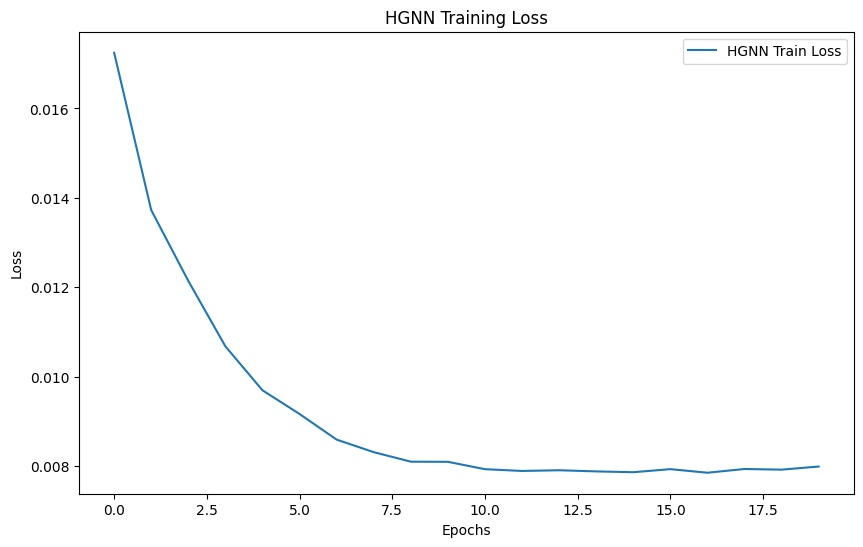

In [51]:
import matplotlib.pyplot as plt

# Plot the training loss for HGNN
plt.figure(figsize=(10, 6))
plt.plot(hgnn_train_loss, label='HGNN Train Loss')
plt.title('HGNN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [53]:
import torch
import torch.nn as nn

class HybridModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim, lstm_units):
        super(HybridModel, self).__init__()
        # HGNN component
        self.conv1 = torch_geometric.nn.GCNConv(in_channels, hidden_dim)

        # Bi-LSTM component
        self.lstm = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=lstm_units,
            num_layers=1,
            batch_first=True,
            bidirectional=True
        )

        # Final prediction layer
        self.fc = nn.Linear(lstm_units * 2, 1)

    def forward(self, x, edge_index, batch_size, seq_length):
        # HGNN forward pass
        x = self.conv1(x, edge_index)

        # Reshape for LSTM
        x = x.view(batch_size, seq_length, -1)

        # Bi-LSTM forward pass
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]

        # Final prediction
        out = self.fc(lstm_out)
        return out

In [54]:
def create_temporal_edge_index(batch_size, seq_length):
    edges = []
    for b in range(batch_size):
        offset = b * seq_length
        for i in range(seq_length):
            # Self-loop
            edges.append([offset + i, offset + i])
            # Connection to next timestamp
            if i < seq_length - 1:
                edges.append([offset + i, offset + i + 1])
                edges.append([offset + i + 1, offset + i])

    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    return edge_index

In [55]:
sequence_length = X_bilstm.shape[1]
n_features = X_bilstm.shape[2]

# Convert to PyTorch tensors if they aren't already
X = torch.FloatTensor(X_bilstm)
y = torch.FloatTensor(y)

# Create dataset and dataloader
dataset = torch.utils.data.TensorDataset(X, y)
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)

In [56]:
# Initialize model
model = HybridModel(
    in_channels=n_features,  # number of features in your data
    hidden_dim=64,
    lstm_units=100
)

# Setup optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [57]:
# Training loop
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
        # Create edge index for the batch
        edge_index = create_temporal_edge_index(X_batch.shape[0], sequence_length)

        # Reshape input for GNN
        X_batch_flat = X_batch.reshape(-1, X_batch.shape[-1])
        y_batch = y_batch.view(-1, 1)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(X_batch_flat, edge_index, X_batch.shape[0], sequence_length)

        # Compute loss
        loss = criterion(outputs, y_batch)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/20], Loss: 0.0088
Epoch [2/20], Loss: 0.0003
Epoch [3/20], Loss: 0.0002
Epoch [4/20], Loss: 0.0002
Epoch [5/20], Loss: 0.0002
Epoch [6/20], Loss: 0.0002
Epoch [7/20], Loss: 0.0002
Epoch [8/20], Loss: 0.0002
Epoch [9/20], Loss: 0.0002
Epoch [10/20], Loss: 0.0002
Epoch [11/20], Loss: 0.0002
Epoch [12/20], Loss: 0.0002
Epoch [13/20], Loss: 0.0002
Epoch [14/20], Loss: 0.0002
Epoch [15/20], Loss: 0.0002
Epoch [16/20], Loss: 0.0002
Epoch [17/20], Loss: 0.0002
Epoch [18/20], Loss: 0.0002
Epoch [19/20], Loss: 0.0002
Epoch [20/20], Loss: 0.0002


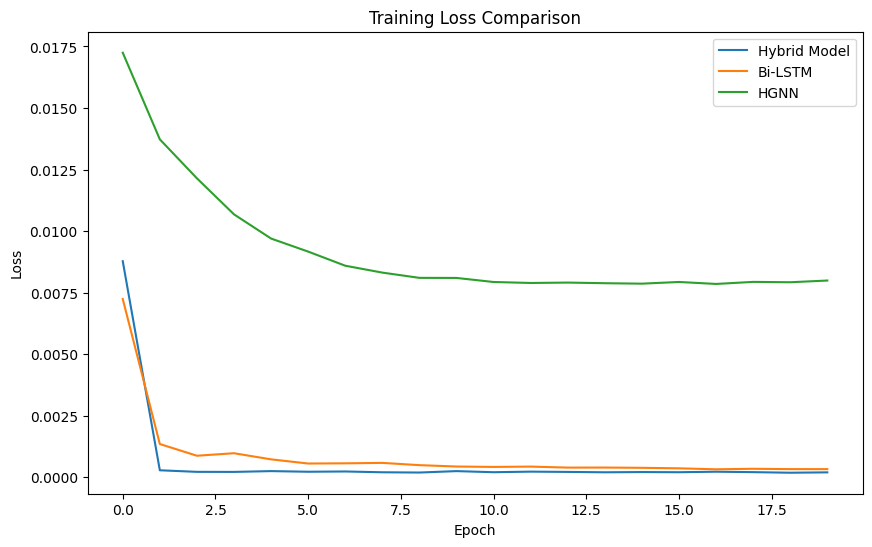

In [58]:
# Plot training losses for both models
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Hybrid Model')
plt.plot(bilstm_train_loss, label='Bi-LSTM')
plt.plot(hgnn_train_loss, label='HGNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

# First, let's split the data
# Assuming X is your input data and y is your target
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

# Prepare test data for Hybrid model
X_test_flat = X_test.reshape(-1, X_test.shape[-1])
edge_index_test = create_temporal_edge_index(X_test.shape[0], sequence_length)

# Prepare test data for Bi-LSTM
X_test_bilstm = X_test

# Prepare test data for HGNN
test_data = Data(x=X_test_flat, edge_index=edge_index_test)

# Now run the predictions
# For Hybrid Model
model.eval()
with torch.no_grad():
    hybrid_pred = model(X_test_flat, edge_index_test, X_test.shape[0], sequence_length)
    hybrid_pred = hybrid_pred.numpy()

# For Bi-LSTM
bilstm_pred = model_bilstm.predict(X_test_bilstm)

# For HGNN
model_hgnn.eval()
with torch.no_grad():
    hgnn_pred = model_hgnn(test_data).numpy()

# Now you can run the metrics calculation and plotting code from the previous message

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


Shapes:
y_test shape: torch.Size([521, 1])
hybrid_pred shape: (521, 1)
bilstm_pred shape: (521, 1)
hgnn_pred shape: (26050, 1)

Hybrid Model Metrics:
MSE: 0.0000
RMSE: 0.0003
MAE: 0.0002
R2 Score: 0.9541

Bi-LSTM Model Metrics:
MSE: 0.0000
RMSE: 0.0021
MAE: 0.0021
R2 Score: -2.2945

HGNN Model Metrics:
MSE: 0.0000
RMSE: 0.0061
MAE: 0.0059
R2 Score: -25.7724


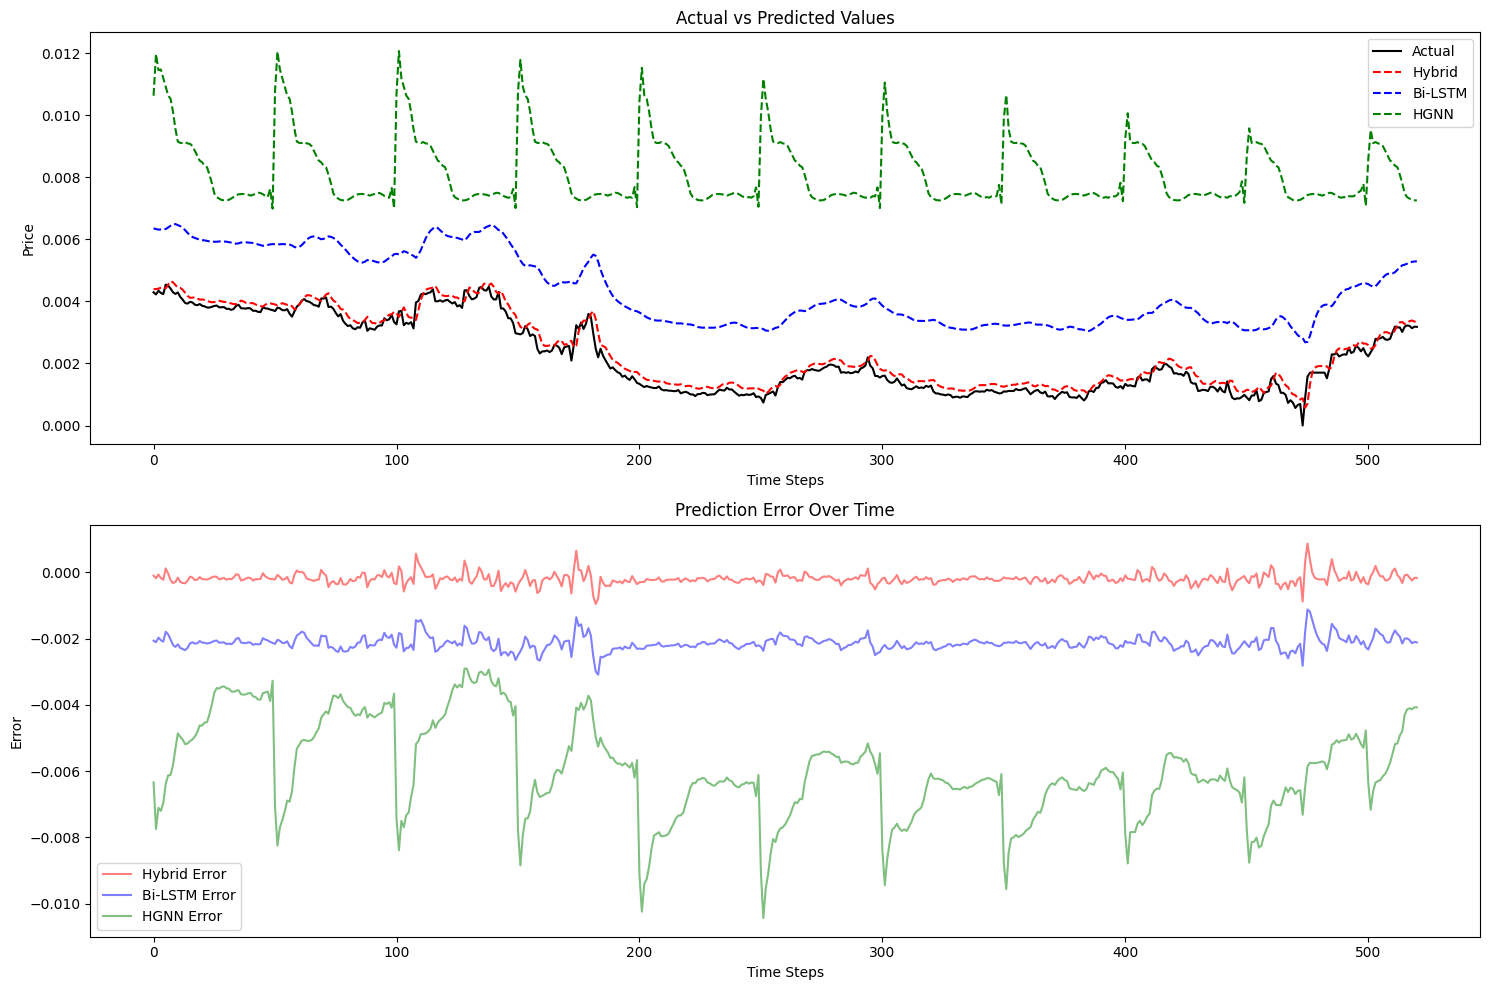

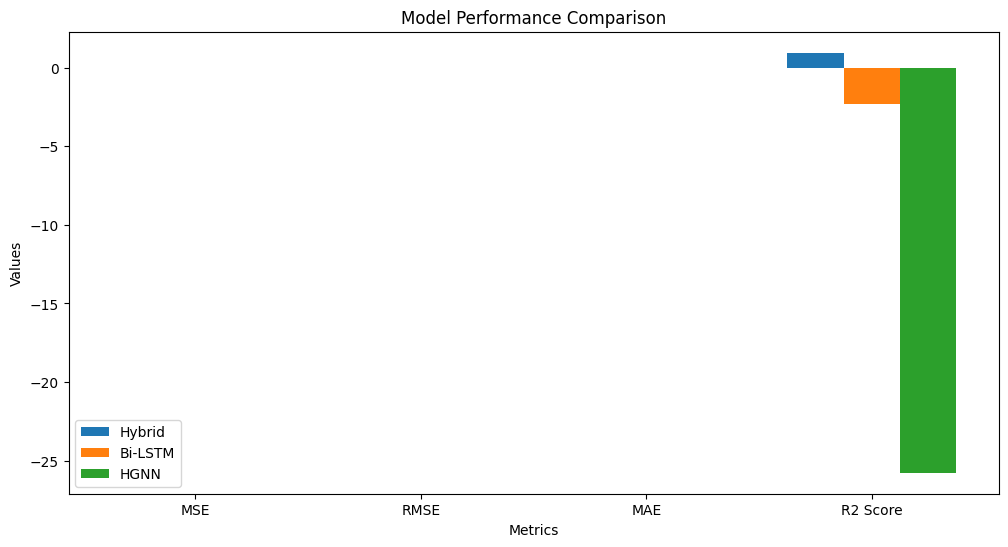

In [62]:
# Print shapes to understand the mismatch
print("Shapes:")
print(f"y_test shape: {y_test.shape}")
print(f"hybrid_pred shape: {hybrid_pred.shape}")
print(f"bilstm_pred shape: {bilstm_pred.shape}")
print(f"hgnn_pred shape: {hgnn_pred.shape}")

# Reshape predictions to match y_test
# Assuming y_test is the correct shape we want
target_length = len(y_test)

# Trim or pad predictions to match target length
def adjust_predictions(pred, target_len):
    if len(pred) > target_len:
        return pred[:target_len]
    elif len(pred) < target_len:
        # Pad with zeros or last value
        return np.pad(pred, (0, target_len - len(pred)), 'edge')
    return pred

# Adjust predictions
hybrid_pred_adjusted = adjust_predictions(hybrid_pred, target_length)
bilstm_pred_adjusted = adjust_predictions(bilstm_pred, target_length)
hgnn_pred_adjusted = adjust_predictions(hgnn_pred, target_length)

# Calculate metrics with adjusted predictions
hybrid_metrics = calculate_metrics(y_test, hybrid_pred_adjusted, "Hybrid Model")
bilstm_metrics = calculate_metrics(y_test, bilstm_pred_adjusted, "Bi-LSTM Model")
hgnn_metrics = calculate_metrics(y_test, hgnn_pred_adjusted, "HGNN Model")

# Plotting with adjusted predictions
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted Values
plt.subplot(2, 1, 1)
plt.plot(y_test, label='Actual', color='black')
plt.plot(hybrid_pred_adjusted, label='Hybrid', color='red', linestyle='--')
plt.plot(bilstm_pred_adjusted, label='Bi-LSTM', color='blue', linestyle='--')
plt.plot(hgnn_pred_adjusted, label='HGNN', color='green', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()

# Plot 2: Prediction Error
plt.subplot(2, 1, 2)
plt.plot(y_test - hybrid_pred_adjusted, label='Hybrid Error', color='red', alpha=0.5)
plt.plot(y_test - bilstm_pred_adjusted, label='Bi-LSTM Error', color='blue', alpha=0.5)
plt.plot(y_test - hgnn_pred_adjusted, label='HGNN Error', color='green', alpha=0.5)
plt.title('Prediction Error Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()

# Create a bar plot comparing metrics
metrics_names = ['MSE', 'RMSE', 'MAE', 'R2 Score']
hybrid_values = hybrid_metrics
bilstm_values = bilstm_metrics
hgnn_values = hgnn_metrics

x = np.arange(len(metrics_names))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, hybrid_values, width, label='Hybrid')
plt.bar(x, bilstm_values, width, label='Bi-LSTM')
plt.bar(x + width, hgnn_values, width, label='HGNN')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics_names)
plt.legend()
plt.show()